# Importing Library

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay

# Loading Dataset

In [3]:
data = pd.read_csv('Social_Network_Ads.csv')

In [4]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Data Visualization

In [8]:
data.shape

(400, 3)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [9]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

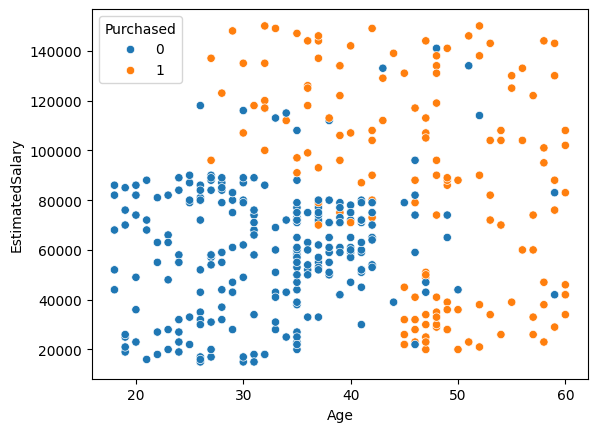

In [6]:
sns.scatterplot(data=data,x='Age',y='EstimatedSalary',hue='Purchased')

Age distribution

<Axes: xlabel='Age', ylabel='Count'>

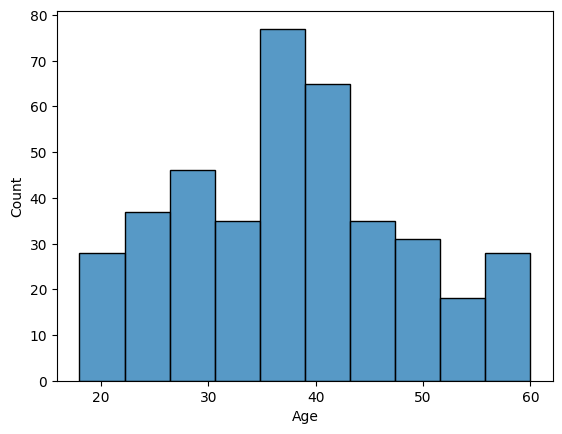

In [12]:
sns.histplot(data=data['Age'])

Box plot of age

<Axes: ylabel='Age'>

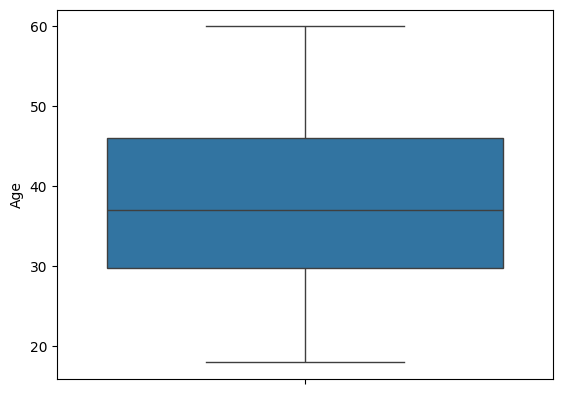

In [11]:
sns.boxplot(data=data['Age'])

Estimated Salary distribution

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

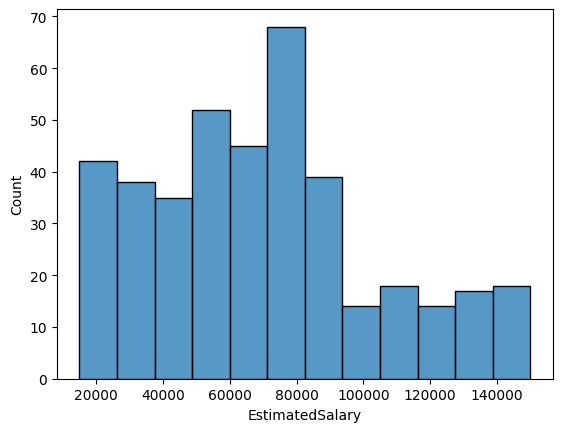

In [14]:
sns.histplot(data=data['EstimatedSalary'])

Box plot of estimated salary

<Axes: ylabel='EstimatedSalary'>

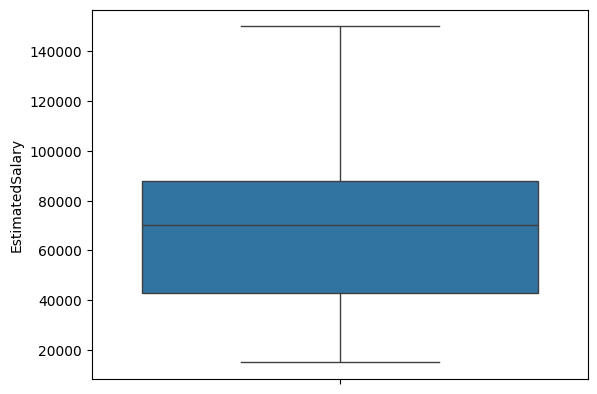

In [13]:
sns.boxplot(data=data['EstimatedSalary'])

Correlation coefficient of every column

<Axes: >

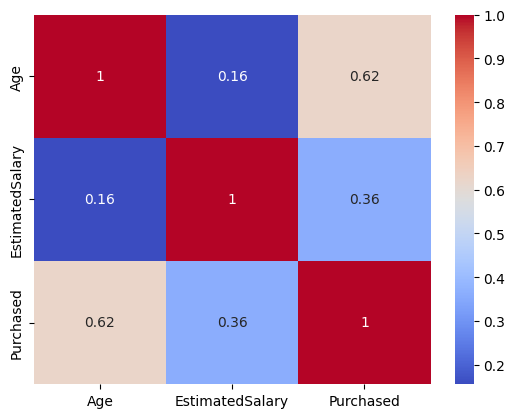

In [7]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

# Preprocessing

Check for missing value

In [15]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [17]:
scaler = StandardScaler()
copydf = data.copy()
copydf = scaler.fit_transform(copydf.drop('Purchased',axis=1))
df_scaled = pd.DataFrame(copydf,columns=data.columns[:-1])

In [18]:
data['Age'] = df_scaled['Age']
data['EstimatedSalary'] = df_scaled['EstimatedSalary']

In [19]:
data.head()

,Age,EstimatedSalary,Purchased
0,-1.781797,-1.490046,0
1,-0.253587,-1.460681,0
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,0


In [20]:
x = data.drop('Purchased',axis=1)
y = data['Purchased']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# Decision Tree

In [21]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        73
           1       0.81      0.81      0.81        47

    accuracy                           0.85       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.85      0.85      0.85       120



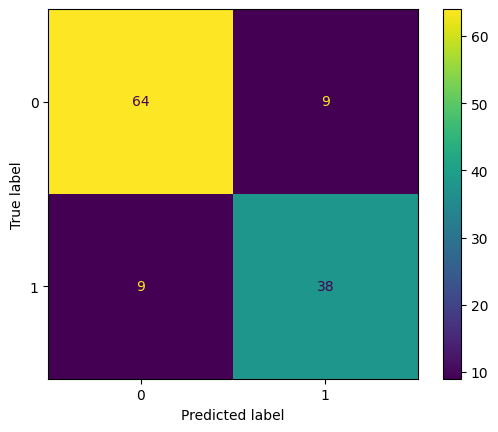

In [24]:
display = ConfusionMatrixDisplay(confusion_matrix(y_test,predictions),display_labels=model.classes_)
display.plot()